In [1]:
library(ggplot2)
library(ggmsa)
library(seqinr)
library(Biostrings)

library(ggtree)
library(ape)
library(phylotools)

library(dplyr)

library(shadowtext)

library(ggseqlogo)

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int

In [2]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/alla/anaconda3/envs/r_env/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_IE.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_IE.UTF-8        LC_COLLATE=en_IE.UTF-8    
 [5] LC_MONETARY=en_IE.UTF-8    LC_MESSAGES=en_IE.UTF-8   
 [7] LC_PAPER=en_IE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_IE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggseqlogo_0.1       shadowtext_0.0.8    dplyr_1.0.7        
 [4] phylotools_0.2.2    ape_5.5             ggtree_2.0.4       
 [7] Biostrings_2.54.0   XVector_0.26.0      IRanges_2.20.0     
[10] S4Vectors_0.24.0    BiocGenerics_0.32.0 seqinr_4.2-8       
[13] ggmsa_1.0.0         

# TIS sequence logo for RiboSET predicted starts 

In [399]:
fastaFile= readRNAStringSet("tmp_res/TIS_Riboseq_pred.fasta")

seq_name = names(fastaFile)
sequence = paste(fastaFile)
df <- data.frame(seq_name, sequence)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


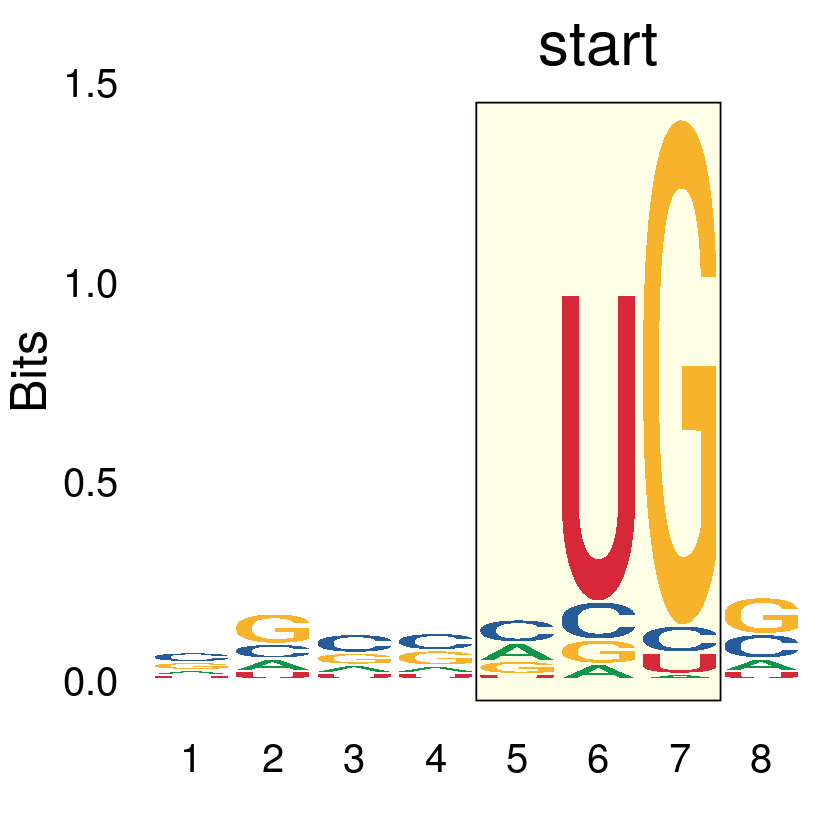

In [400]:
q <- ggplot() + 
  annotate('rect', xmin = 4.5, xmax = 7.5, ymin = -0.05, ymax = 1.45, alpha = .1, col='black', fill='yellow') +
  geom_logo(df$sequence, stack_width = 0.90)+ theme_logo() + 
 theme(text = element_text(size=30)) + 
    #annotate('segment', x = 4.5, xend=7.5, y=1.5, yend=1.5, size=2) + 
  annotate('text', x=6, y=1.6, label='start', size=13)

q

In [402]:
ggsave(plot = q, width = 7, height = 3.5, dpi = 300, filename = "plots/seq_logo_TIS_RiboSET.png")

# MSA plot (GTG-start + Kozak)

a <- c('#F2C9F2', '#F2C9F2', '#F2C9F2', #primatomorha 
        '#E65261',  '#E65261', '#E65261','#E65261',#Glires mouse rat rabbit Wild_bactrian_camel Cetartiodactyla
        '#2D7FC7','#2D7FC7','#2D7FC7', #Cetartiodactyla Beluga_whale cow pig
        '#E9AA17', '#E9AA17','#E9AA17', #Perissodactyla Horse  Przewalski_horse White_rhinoceros
        '#FFB2B2', '#FFB2B2','#FFB2B2', # Ferae Cat  Chinese_pangolin Weddell_seal
        '#72D068', '#72D068','#72D068', # Chiroptera  Large_flying_fox  Microbat Common_vampire_bat
        '#1D7513',  '#1D7513', '#1D7513',  # Eulipotyphla Hedgehog  Shrew Star_nosed_mole 
        '#9CD2FF', '#9CD2FF', '#9CD2FF',  # Atlantogenata Elephant Manatee Armadillo 
        '#FFCC99', '#FFCC99', '#FFCC99'  # NonPlacental Opossum Tasmanian_devil Koala 
)

a1 <- rev(a)

a1

In [405]:
s = readRNAStringSet("tmp_res/ENST00000357214.5_TIS_msa.fasta")

s

  A RNAStringSet instance of length 28
     width seq                                              names               
 [1]     9 CAA-GGUGG                                        Human
 [2]     9 CAA-GGUGG                                        Chimp
 [3]     9 CAA-GGUGG                                        Green_monkey
 [4]     9 CAA-GGUGG                                        Mouse
 [5]     9 CAA-GGUGG                                        Rat
 ...   ... ...
[24]     9 CAA-AGUGG                                        Manatee
[25]     9 CAA-GGUGG                                        Armadillo
[26]     9 CAA-GGUGG                                        Opossum
[27]     9 CAA-GGUGG                                        Tasmanian_devil
[28]     9 CAA-GGUGG                                        Koala

In [419]:
q = ggmsa(s, color = 'Chemistry_NT', seq_name = T, char_width = 0.7) +#+ geom_seqlogo() +
          theme(axis.text.y = element_text(size=18)) 
          





#“Shapely_NT”, “Zappo_NT”, “Taylor_NT”

ggsave(plot = q, width = 3, height = 8, dpi = 300, filename = "plots/ENST00000357214.5_msa.png")

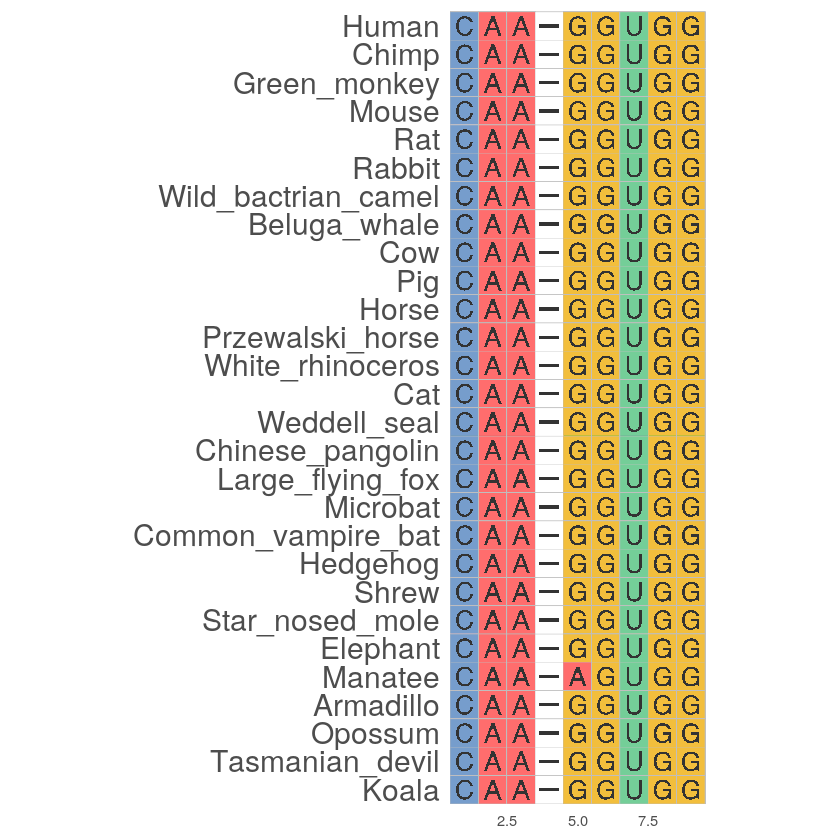

In [420]:
q

In [ ]:
#ggsave(plot = q, width = 3, height = 8, dpi = 300, filename = "plots/ENST00000357214.5_msa.png")

In [22]:
s = readRNAStringSet("tmp_res/MARVELD1_ENST00000285605.7_Kozak.fasta")

q = ggmsa(s, color = 'Chemistry_NT', seq_name = T, char_width = 0.7) +#+ geom_seqlogo() +
          theme(axis.text.y = element_text(size=18)) 
          
ggsave(plot = q, width = 8, height = 18, dpi = 300, filename = "plots/MARVELD1_msa.png")

q

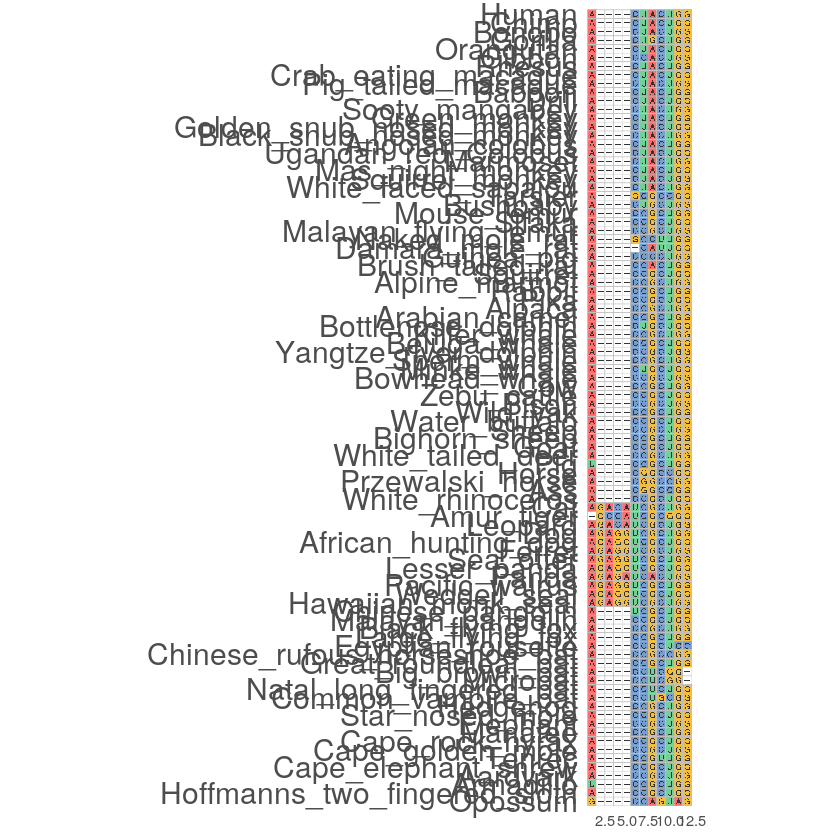

In [26]:
s = readRNAStringSet("tmp_res/STK38_ENST00000229812.7_Kozak.fasta")

q = ggmsa(s, color = 'Chemistry_NT', seq_name = T, char_width = 0.7) +#+ geom_seqlogo() +
          theme(axis.text.y = element_text(size=18)) 
          
ggsave(plot = q, width = 8, height = 18, dpi = 300, filename = "plots/STK38_msa.png")

q

# Open tree (120 mammals)

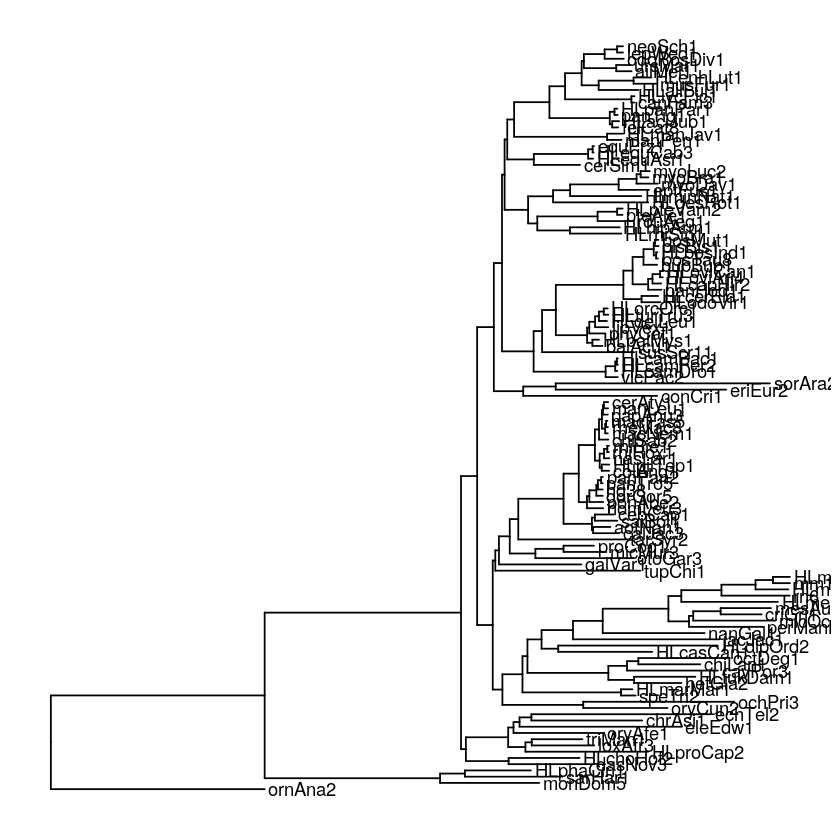

In [228]:
filename <- "data/tree_hg38_assembly_120mammal.nh"
tree <- ape::read.tree(filename)
ggtree(tree) + geom_tiplab()

# Prune it according to the list of selected species 

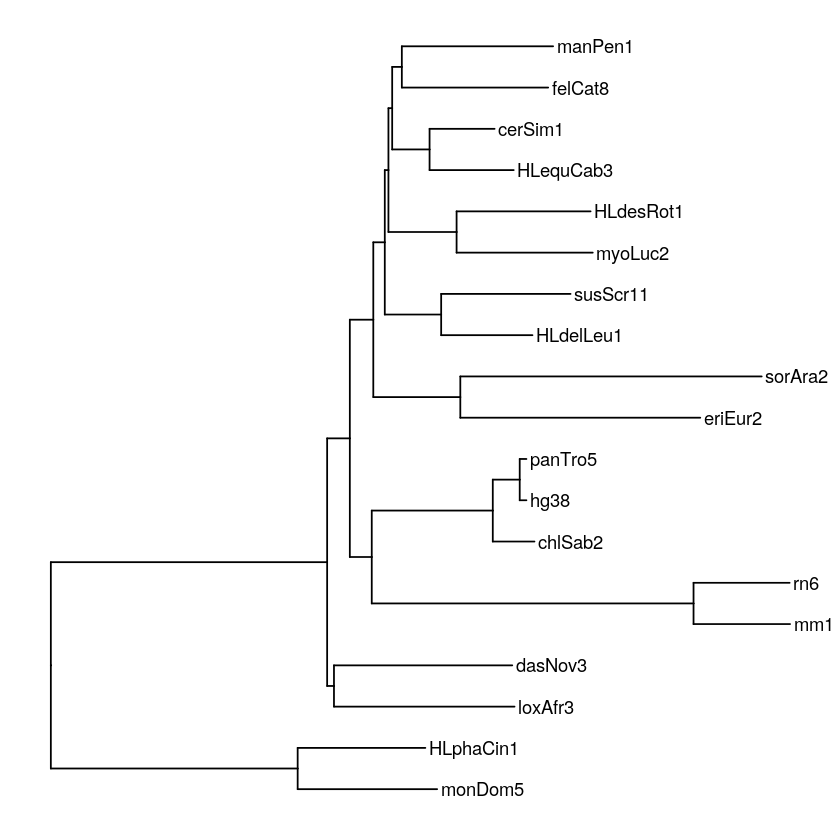

In [230]:
species <- c('dasNov3', 'loxAfr3', 'susScr11', 'HLdelLeu1', 'myoLuc2', 'HLdesRot1',
 'eriEur2', 'sorAra2', 'felCat8', 'manPen1', 'mm10', 'rn6', 'monDom5', 'HLphaCin1', 'HLequCab3',
             'cerSim1', 'panTro5', 'chlSab2', 'hg38')

pruned.tree<-drop.tip(tree,tree$tip.label[-match(species, tree$tip.label)])

ggtree(pruned.tree) + geom_tiplab()

# Change scientific names on casual 

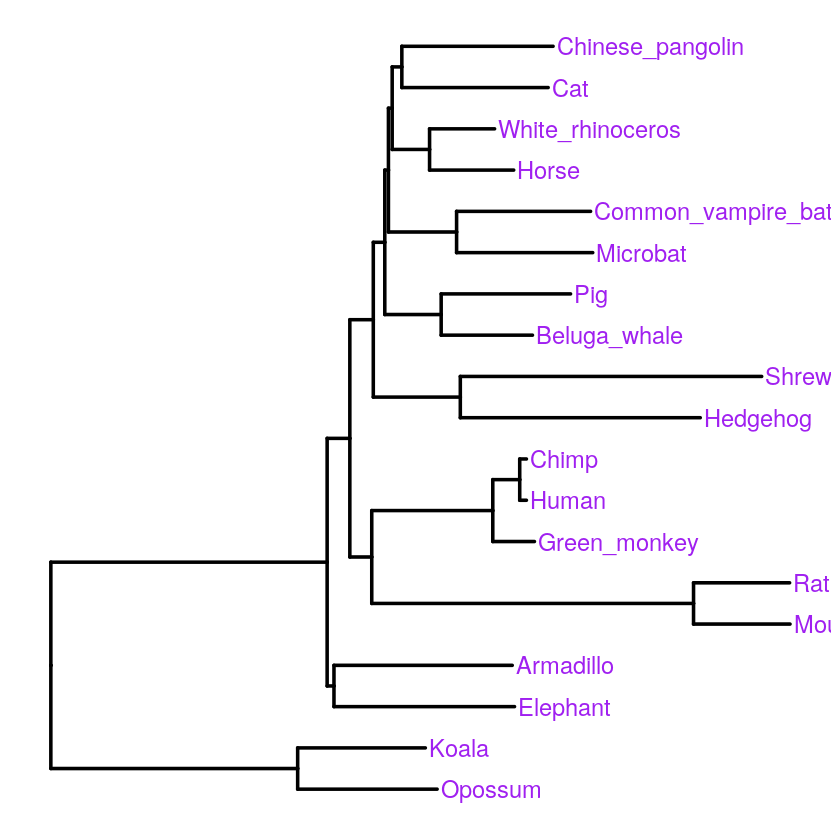

In [231]:
tips <- pruned.tree$tip.label

names <- c('Human',
 'Chimp',
 'Green_monkey',
 'Mouse',
 'Rat',
 'Beluga_whale',
 'Pig',
 'Horse',
 'White_rhinoceros',
 'Cat',
 'Chinese_pangolin',
 'Microbat',
 'Common_vampire_bat',
 'Hedgehog',
 'Shrew',
 'Elephant',
 'Armadillo',
 'Opossum',
 'Koala')

dat <- data.frame(tips, names)

ntree <- sub.taxa.label(pruned.tree, dat)

p <- ggtree(ntree, size=1) + geom_tiplab(size=5, color="purple") # + xlim_tree(1.5)

p

In [232]:
data <- tidy_msa(s)

data %>% head(3)

,name,position,character
,<fct>,<dbl>,<chr>
1,Human,1,C
2,Chimp,1,C
3,Green_monkey,1,C


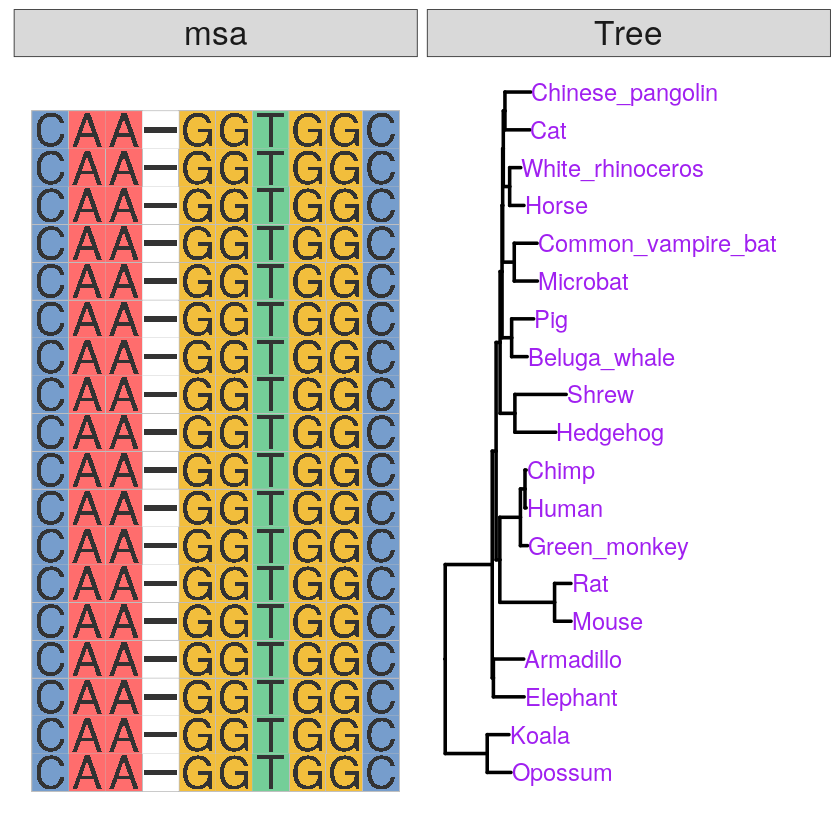

In [233]:
facet_plot(p, geom=geom_msa,  data = data,  panel = 'msa',
               color = 'Chemistry_NT')  + theme(strip.text = element_text(size = 20)) + xlim_tree(2)

In [136]:
ggsave(plot = q, width = 15, height = 8, dpi = 300, filename = "plots/ENST00000357214.5_msa.png")

In [ ]:
data <- tidy_msa(s)

data %>% head(3)

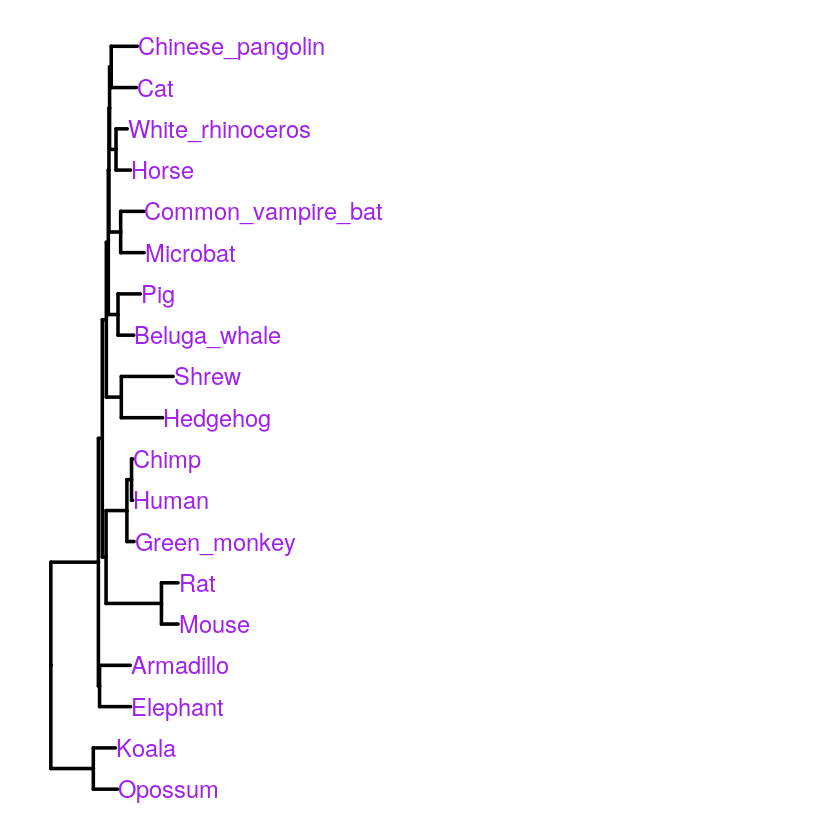

In [234]:
p <- ggtree(ntree, size=1) + geom_tiplab(size=5, color="purple") + xlim_tree(4)

p

In [235]:
ntree$tip.label

[1] "Human"              "Chimp"              "Green_monkey"      
 [4] "Mouse"              "Rat"                "Beluga_whale"      
 [7] "Pig"                "Horse"              "White_rhinoceros"  
[10] "Cat"                "Chinese_pangolin"   "Microbat"          
[13] "Common_vampire_bat" "Hedgehog"           "Shrew"             
[16] "Elephant"           "Armadillo"          "Opossum"           
[19] "Koala"

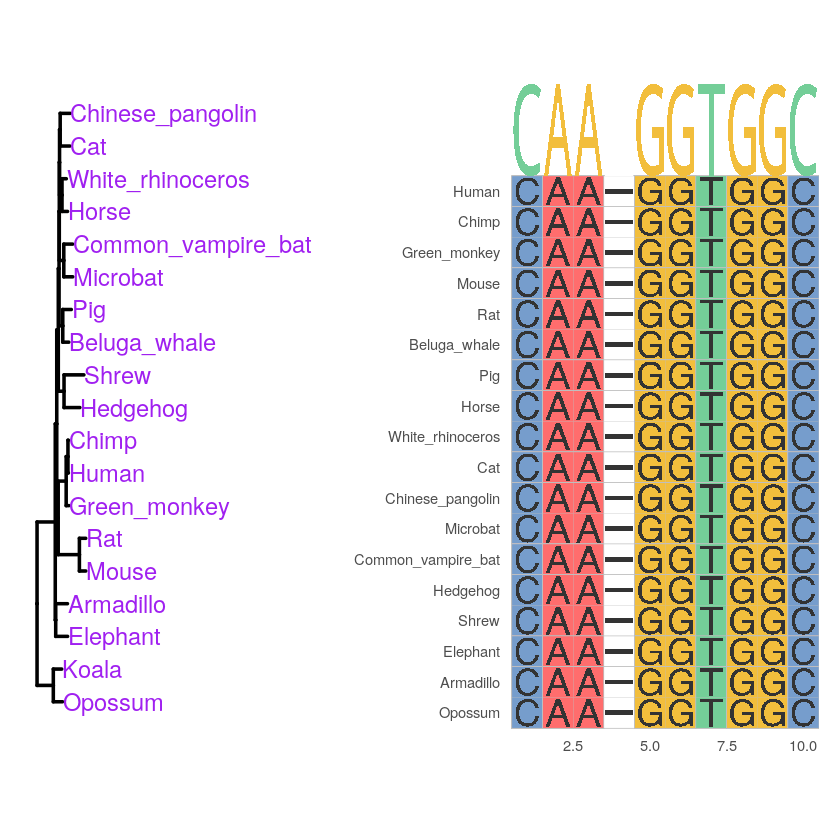

In [236]:
p %<+% data + ggmsa(s, color = 'Chemistry_NT', seq_name = T) + geom_seqlogo() 

In [262]:
p %<+%  s + ggmsa(color = 'Chemistry_NT', seq_name = T) + geom_seqlogo() 

ERROR: Error in p %<+% s: input should be a data.frame...
